# BANK TELEMARKETING


---






# Import the package 

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [0]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorflow 

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


print(f"Your version of Pytorch is {torch.__version__}. You should use a version >0.4.")

Your version of Pytorch is 0.4.1. You should use a version >0.4.


In [0]:
# If a GPU is available, use it
# Pytorch uses an elegant way to keep the code device agnostic
if torch.cuda.is_available():
    device = torch.device("cuda")
    use_cuda = True
else:
    device = torch.device("cpu")
    use_cuda = False
    
print(device)

cuda


In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the dataset and process the dataset

In [0]:
bank =pd.read_csv('drive/My Drive/PROJECT /bank-additional-full.csv',delimiter=';',header=0)
bank.shape

(41188, 20)

In [0]:
# On tranforme les output par 1 pour yes et 0 pour non 
bank.y.replace(('yes','no'),(1,0), inplace=True)

# Data analysis tables & figures 

### Pie chart with the percentage of instances for each class

In [0]:
size = bank.iloc[:,-1]
size.shape
# On compte le nombre de yes et de qu'il ya 
nombre_yes = np.count_nonzero(size==1)
nombre_no = np.count_nonzero(size==0)
print(nombre_yes)
print(nombre_no)

4640
36548


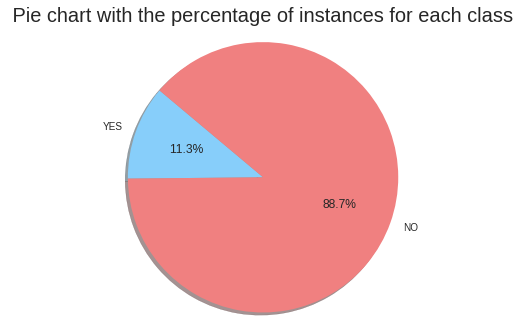

In [0]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'YES', 'NO', 
sizes = [nombre_yes,nombre_no]
colors = [ 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',shadow=True, startangle=140)
 
plt.axis('equal')
plt.title(' Pie chart with the percentage of instances for each class ',fontsize=20)
plt.show()  

## Type of the features

In [0]:
print("Data Types:", bank.dtypes)

Data Types: age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


##Statistical Description

In [0]:
print("Statistical Description:", bank.describe())

Statistical Description:                age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed             y  
count    41188.000000   41188.000000  41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911      0.112654  
std          0.578840       4

## Distribution of the features 

In [0]:
# shuffle the dataset
from sklearn.utils import shuffle
bank = shuffle(bank)

### Bank client data analysis and categorical treatment

In [0]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
31176,48,blue-collar,married,basic.4y,no,no,no
15247,35,self-employed,married,university.degree,no,no,no
34251,26,self-employed,married,high.school,no,yes,yes
17520,46,admin.,married,high.school,no,no,no
19002,52,technician,divorced,professional.course,no,yes,no


#### Age

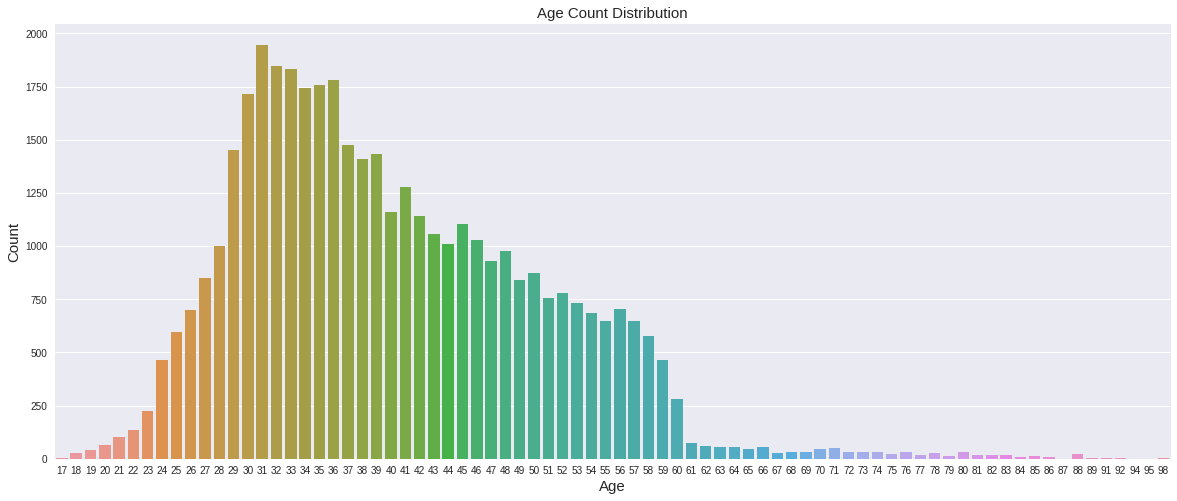

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

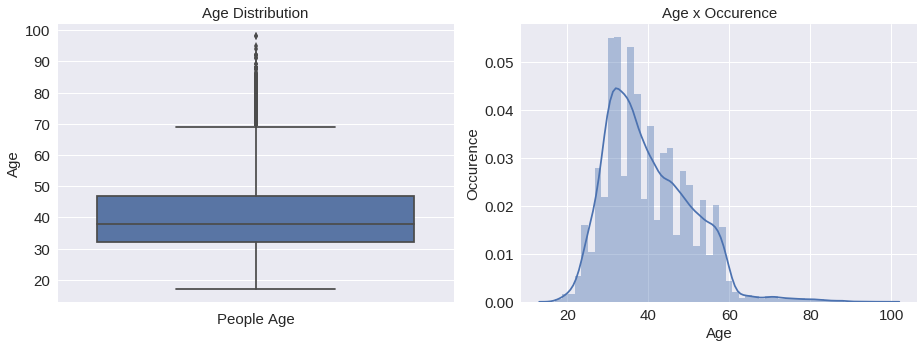

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Job

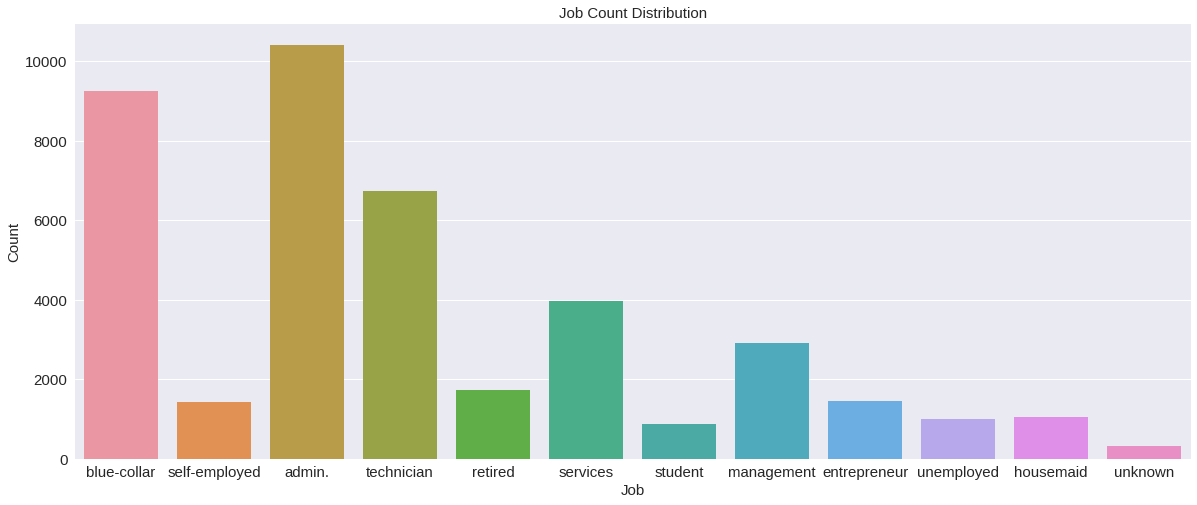

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#### Marital

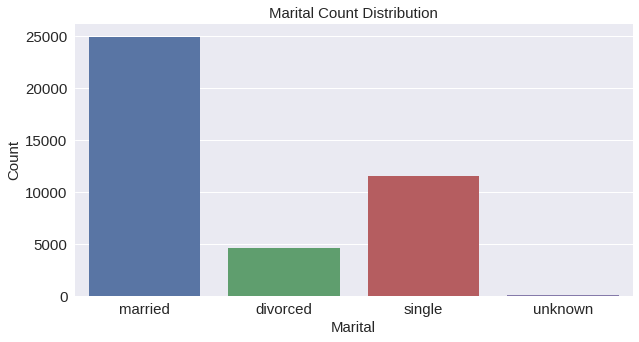

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#### Education

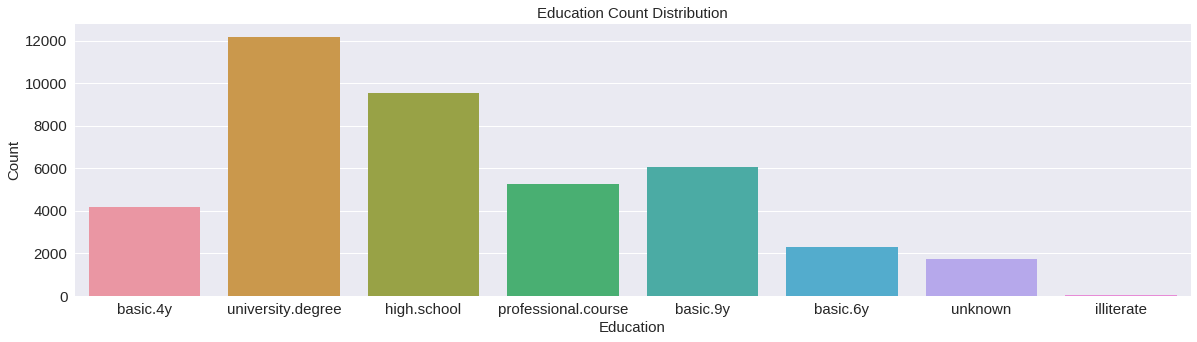

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#### Default, housing, loan

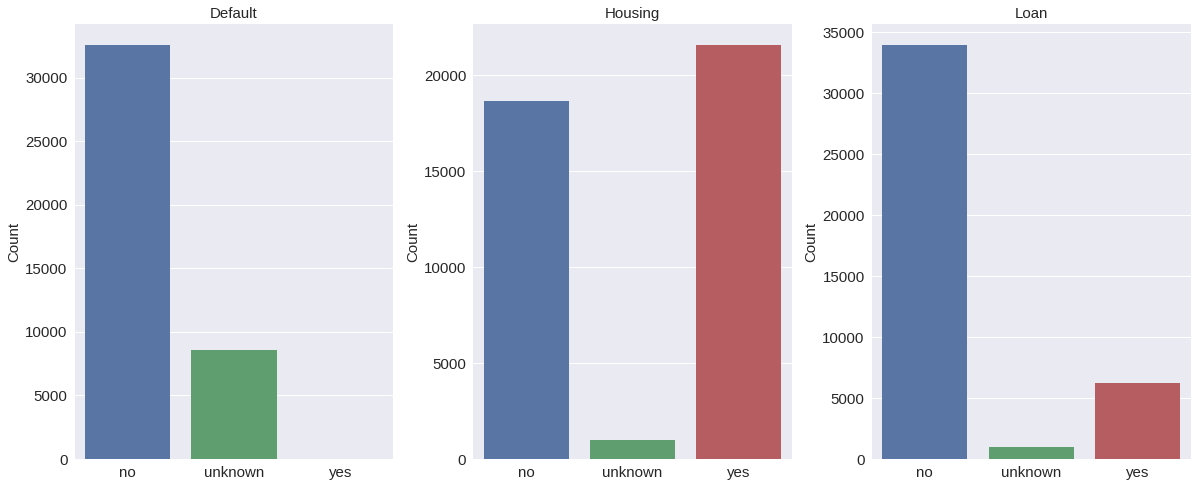

In [0]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

## Correlation Matrix 

In [0]:
corr = bank.corr(method='pearson')

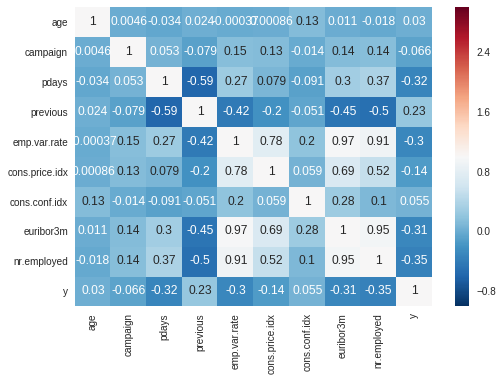

In [0]:
sns.heatmap(corr, center=True,vmin=-1, vmax=1,robust=True,annot=True)
plt.show()

After studying the correlation matrix, we notice that the euribor3 and the nr.employed are strongly correlated with emp var rate, so we decide to remove these 2 columns 

In [0]:
bank = bank.drop(['euribor3m', 'nr.employed'], axis=1)

# Data Prepocessing

### Bank client categorical treatment



#### Categorical treatment ( age )

In [0]:
#function to create group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

#### Encoding the categorical features 

In [0]:
# Ici on procède à l'encoding des features qui sont de type catégories en appliquant la fonction get.dummies. 
# On peut l'appliquer directement sur tous les features, car elle va considérer 
# que les features de type categories et ignoner ceux de type numerique
t = pd.get_dummies(bank.iloc[:,:-1])
t.shape

(41188, 60)

In [0]:
feat_T = t.iloc[:,:].values
feat_T.shape

(41188, 60)

In [0]:
feat_T1 = feat_T[:,7:]
feat_T1.shape

(41188, 53)

### After Encoding the categorical attributes , we normalize the continues ones 

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
feat_T2 = sc_X.fit_transform(feat_T[:,1:7])
feat_T2.shape

(41188, 6)

In [0]:
feat_T3 = np.concatenate((feat_T2,feat_T1),axis=1)
feat_T3.shape

(41188, 59)

In [0]:

# on transforme aussi la colonne age en encoding 
age = feat_T[:,0]
age

array([3., 2., 1., ..., 2., 2., 2.])

In [0]:
age_hot =to_categorical(age)
age_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

# Splitting the data 

## Features and ouput separation 

In [0]:
# On rajoute la partie transformer aux restes des features 
features = np.concatenate((age_hot,feat_T3),axis=1)
features.shape

(41188, 64)

In [0]:
output=bank.iloc[:,-1].values
output.shape

(41188,)

## Train (70%) & Test (30%) set splitting 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, output , test_size=0.3, random_state=1)
print(x_train.shape)
print(y_train.shape)

print(" ")
print(x_test.shape)
print(y_test.shape)

(28831, 64)
(28831,)
 
(12357, 64)
(12357,)


# Models with strategy 1 :  No compensation for the under-represented class in the dataset applied

## 1. Logistic Regression 

### Hyperparameters Tuning 

In [0]:
# On utilise la fonction GridSearchCV qui optimise les hyperparametres qu'on lui donne à l'avance 
# dual = False par default, et on le laisse car n_samples > n_features 
# multi_class = ovr par defailt, et on le laisse car on est en classification binaire 
# verbose = 0 par default 

'''
grid = {
        'C': [1e-4,1e-1]
         , 'solver': ('newton-cg','liblinear')  , 'tol' : [1e-4,1e-1] , 'max_iter' : [100,1000,10000]
         
    }
clf = LogisticRegression(penalty='l2', random_state=2) 
gs = GridSearchCV(clf, grid, scoring='roc_auc',cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_) '''

"\ngrid = {\n        'C': [1e-4,1e-1]\n         , 'solver': ('newton-cg','liblinear')  , 'tol' : [1e-4,1e-1] , 'max_iter' : [100,1000,10000]\n         \n    }\nclf = LogisticRegression(penalty='l2', random_state=2) \ngs = GridSearchCV(clf, grid, scoring='roc_auc',cv=3)\ngs_train = gs.fit(x_train, y_train)\nprint ('gs.best_score_:', gs.best_score_) "

### Best hyparameters 

In [0]:
print ('gs.best_param:', gs.best_params_)

gs.best_param: {'C': 0.0001, 'kernel': 'sigmoid', 'tol': 0.0001}


### Creation of the model 

In [0]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = LogisticRegression(penalty='l2', random_state=1 , max_iter=100, C = 0.1 , solver = 'newton-cg',tol = 0.1 )

### Training of the model 

In [0]:
model.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='newton-cg', tol=0.1,
          verbose=0, warm_start=False)

### Test set prediction & Accuracy

In [0]:
pre = model.predict(x_test)
accuracy_score(y_test,pre)

0.8990855385611395

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m

array([[10804,   176],
       [ 1071,   306]])

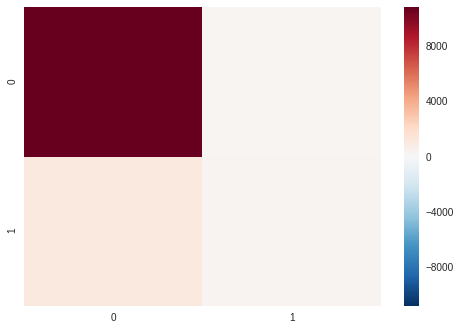

In [0]:
sns.heatmap(m, center=True)
plt.show()

##2. Random Forest 

### Hyperparameters Tuning 

In [0]:
'''
grid = {
    'n_estimators': [200, 500],
    'max_features': ('auto', 'log2'),
    'max_depth' : [15,20,30,40,50],
    'criterion' : ('gini','entropy')  
}
clf = RandomForestClassifier( random_state=4 ) 
gs = GridSearchCV(clf, grid,cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_) '''

"\ngrid = {\n    'n_estimators': [200, 500],\n    'max_features': ('auto', 'log2'),\n    'max_depth' : [15,20,30,40,50],\n    'criterion' : ('gini','entropy')  \n}\nclf = RandomForestClassifier( random_state=4 ) \ngs = GridSearchCV(clf, grid,cv=3)\ngs_train = gs.fit(x_train, y_train)\nprint ('gs.best_score_:', gs.best_score_) "

### Best hyparameters 

In [0]:
print ('gs.best_param:', gs.best_params_)

gs.best_param: {'C': 0.0001, 'kernel': 'sigmoid', 'tol': 0.0001}


### Creation of the model 

In [0]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = RandomForestClassifier(max_depth= 15, max_features = 'auto', n_estimators= 500,criterion = 'entropy')

### Training of the model 

In [0]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Test set prediction & Accuracy 

In [0]:
pre = model.predict(x_test)
accuracy_score(y_test,pre) 

0.9005422028000324

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m

array([[10791,   189],
       [ 1040,   337]])

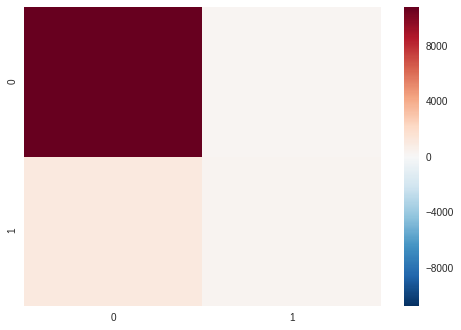

In [0]:
sns.heatmap(m, center=True)
plt.show()

### Scalling the features for SVM and MLP 



In [0]:
''' from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test) '''

' from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nx_train = sc_X.fit_transform(x_train)\nx_test = sc_X.transform(x_test) '

## 3. SVM

### Hyperparameters Tuning 

In [0]:
# On reutilise la fonction GridSearchCV comme précédement, afin d'optimiser les hyperparametres 
# En tunant, on voit que le kernel utiliser est rbf donc l'hyperparametres degree est ignoner, vu qu'on est pas en poly 
# Pareil pour coef_0, significatif que lorsque l'on est en poly ou sigmoid 
# decision_function_shape = ovr car on est classification binaire
'''
grid = {
        'C': [1e-4,1e-1],
        'kernel': ('linear', 'poly', 'rbf','sigmoid') , 
        'tol' : [1e-4,1e-1]     
    }
clf = SVC( random_state=5,max_iter=100,verbose=False) 
gs = GridSearchCV(clf, grid,cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_) '''

"\ngrid = {\n        'C': [1e-4,1e-1],\n        'kernel': ('linear', 'poly', 'rbf','sigmoid') , \n        'tol' : [1e-4,1e-1]     \n    }\nclf = SVC( random_state=5,max_iter=100,verbose=False) \ngs = GridSearchCV(clf, grid,cv=3)\ngs_train = gs.fit(x_train, y_train)\nprint ('gs.best_score_:', gs.best_score_) "

### Best hyparameters 

In [0]:
'''print ('gs.best_param:', gs.best_params_)'''

"print ('gs.best_param:', gs.best_params_)"

### Creation of the model 

In [0]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = SVC(C = 0.01, kernel = 'poly', tol= 0.0001 )

### Training of the model 

In [0]:
model.fit(x_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

### Test set prediction & Accuracy 

In [0]:
pre = model.predict(x_test)
accuracy_score(y_test,pre)

0.8918831431577243

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m                  

array([[10924,    56],
       [ 1280,    97]])

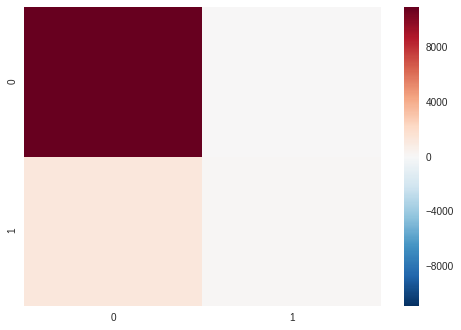

In [0]:
sns.heatmap(m, center=True)
plt.show()

## 4.Neural Network

### Hyperparameters Tuning 

In [0]:
'''
grid = {
        'activation' : ( 'logistic', 'tanh', 'relu'),
        'solver' : ('lbfgs', 'sgd', 'adam') , 
        'alpha' : [1e-4,1e-1],
        'batch_size' : [50,100],
        'max_iter' : [100,500],
    }
clf = MLPClassifier( random_state=6,verbose=False) 
gs = GridSearchCV(clf, grid,cv=3)
gs_train = gs.fit(x_train, y_train)
print ('gs.best_score_:', gs.best_score_) '''

"\ngrid = {\n        'activation' : ( 'logistic', 'tanh', 'relu'),\n        'solver' : ('lbfgs', 'sgd', 'adam') , \n        'alpha' : [1e-4,1e-1],\n        'batch_size' : [50,100],\n        'max_iter' : [100,500],\n    }\nclf = MLPClassifier( random_state=6,verbose=False) \ngs = GridSearchCV(clf, grid,cv=3)\ngs_train = gs.fit(x_train, y_train)\nprint ('gs.best_score_:', gs.best_score_) "

### Best hyparameters 

In [0]:
'''print ('gs.best_param:', gs.best_params_)'''

"print ('gs.best_param:', gs.best_params_)"

### Creation of the model 

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(5,1),verbose=1,
                    learning_rate_init= 0.01, max_iter=100,activation= 'tanh',
                   solver = 'sgd',batch_size=50)

### Training of the model 

In [0]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.35574670
Iteration 2, loss = 0.29872163
Iteration 3, loss = 0.28045224
Iteration 4, loss = 0.27806233
Iteration 5, loss = 0.27743851
Iteration 6, loss = 0.27680068
Iteration 7, loss = 0.27631678
Iteration 8, loss = 0.27565526
Iteration 9, loss = 0.27591550
Iteration 10, loss = 0.27520167
Iteration 11, loss = 0.27479860
Iteration 12, loss = 0.27442259
Iteration 13, loss = 0.27420945
Iteration 14, loss = 0.27420827
Iteration 15, loss = 0.27379580
Iteration 16, loss = 0.27342798
Iteration 17, loss = 0.27336147
Iteration 18, loss = 0.27311620
Iteration 19, loss = 0.27293613
Iteration 20, loss = 0.27248596
Iteration 21, loss = 0.27238828
Iteration 22, loss = 0.27212458
Iteration 23, loss = 0.27214913
Iteration 24, loss = 0.27195700
Iteration 25, loss = 0.27171570
Iteration 26, loss = 0.27171713
Iteration 27, loss = 0.27176211
Iteration 28, loss = 0.27139008
Iteration 29, loss = 0.27140560
Iteration 30, loss = 0.27101632
Iteration 31, loss = 0.27138813
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 1), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

### Test set prediction & Accuracy 

In [0]:
pre = mlp.predict(x_test)
accuracy_score(y_test,pre)

0.8992473901432386

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m

array([[10765,   215],
       [ 1030,   347]])

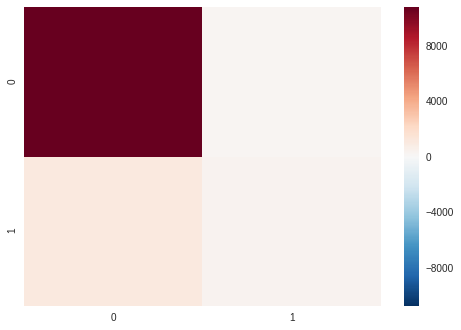

In [0]:
sns.heatmap(m, center=True)
plt.show()

# Models with strategy 2 :  Compensate the under-representation of the minority class in the dataset  for the algorithms using class_weight

In [0]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights

array([0.56381023, 4.41786699])

##1. Logistic Regression 

### Creation of the model 

In [0]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = LogisticRegression(class_weight=class_weights, penalty='l2', random_state=7 , max_iter=100, C = 0.1 , solver = 'newton-cg',tol = 0.0001 )

### Training of the model 

In [0]:
model.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight=array([0.56381, 4.41787]), dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=7,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

### Test set prediction & Accuracy

In [0]:
pre = model.predict(x_test)
accuracy_score(y_test,pre)

0.8990046127700898

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m

array([[10803,   177],
       [ 1071,   306]])

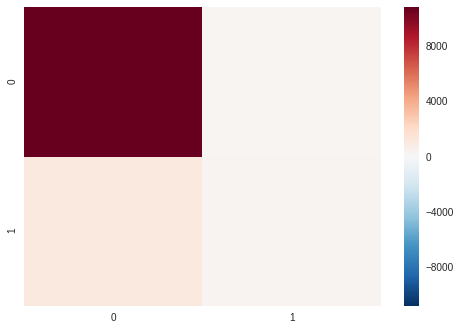

In [0]:
sns.heatmap(m, center=True)
plt.show()

## 2. Random Forest 

### Creation of the model 

In [0]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = RandomForestClassifier(class_weight={1:0.56,
                                             0:6.01} , max_depth= 15, verbose = 1, max_features = 'log2', n_estimators= 200 , criterion = 'gini')

### Training the model 

In [0]:
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.8s finished


RandomForestClassifier(bootstrap=True, class_weight={1: 0.56, 0: 6.01},
            criterion='gini', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

### Test set prediction & Accuracy

In [0]:
pre = model.predict(x_test)
accuracy_score(y_test,pre) 

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


0.8971433195759488

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m

array([[10902,    78],
       [ 1193,   184]])

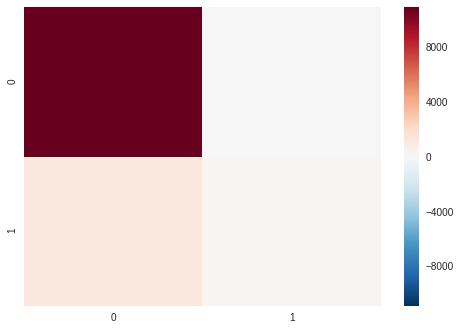

In [0]:
sns.heatmap(m, center=True)
plt.show()

## 3.SVM

### Creation of the model 

In [0]:
# Une fois les hyperparametres optimisés, on les rentre pour la fonction et on regarde le accuracy sur le test set 
model = SVC(class_weight={0:0.56,
                          1:4.01} ,C = 0.01, kernel = 'poly', tol= 0.0001 )

In [0]:
#kernel': ('linear', 'poly', 'rbf','sigmoid')

### Training of the model 

In [0]:
model.fit(x_train,y_train)

SVC(C=0.01, cache_size=200, class_weight={0: 0.56, 1: 4.01}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

### Test set prediction & Accuracy

In [0]:
pre = model.predict(x_test)
accuracy_score(y_test,pre)

0.8975479485311969

### Confusion Matrix 

In [0]:
m = confusion_matrix(y_test, pre)
m                  

array([[10802,   178],
       [ 1088,   289]])

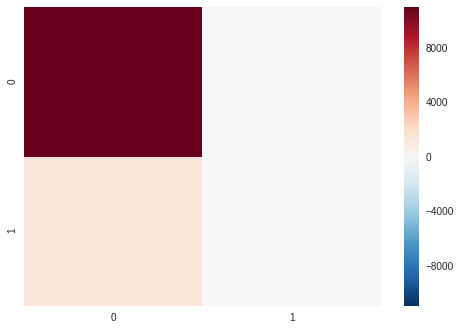

In [0]:
sns.heatmap(m, center=True)
plt.show()

## 4 Neural Network

### Creation of the model 

In [0]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=64, kernel_initializer='normal', activation='linear'))
model.add(Dropout(0.3))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


ftrain = model.predict_classes(x_test,verbose=1)
#plt.plot(ftrain)

12357/12357 [==============================] - 1s 42us/step


### Training of the model 

In [0]:
model_train = model.fit(x_train, y_train, validation_split=0.3, epochs=5, batch_size=50, verbose=1,class_weight = class_weights )

Train on 20181 samples, validate on 8650 samples
Epoch 1/5
20181/20181 [==============================] - 3s 155us/step - loss: 0.3828 - acc: 0.8817 - val_loss: 0.2936 - val_acc: 0.8968
Epoch 2/5
20181/20181 [==============================] - 3s 141us/step - loss: 0.3004 - acc: 0.8995 - val_loss: 0.2861 - val_acc: 0.8970
Epoch 3/5
20181/20181 [==============================] - 3s 140us/step - loss: 0.2954 - acc: 0.8991 - val_loss: 0.2829 - val_acc: 0.8970
Epoch 4/5
20181/20181 [==============================] - 3s 140us/step - loss: 0.2925 - acc: 0.8990 - val_loss: 0.2814 - val_acc: 0.8979
Epoch 5/5
20181/20181 [==============================] - 3s 140us/step - loss: 0.2905 - acc: 0.8995 - val_loss: 0.2806 - val_acc: 0.8984


### Test set prediction & Accuracy

In [0]:
pre = model.predict_classes(x_test,verbose=0)
accuracy_score(y_test,pre)

0.8978716516953953

### Confusion Matrix

In [0]:
m = confusion_matrix(y_test, pre)
m

array([[10821,   159],
       [ 1103,   274]])

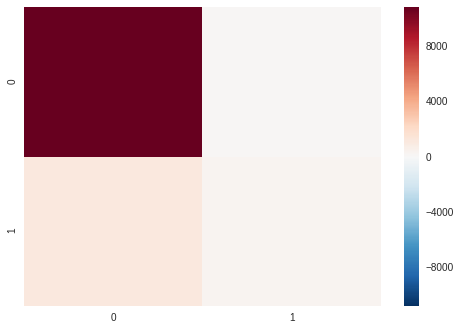

In [0]:
sns.heatmap(m, center=True)
plt.show()